# Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Data Import

In [2]:
# iris data set - Continuous Predicting Categorical
data = sns.load_dataset('iris')
hue = 'species'
X = data.drop('species', axis=1)
y = data['species']
labels = y.unique()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
# Noisy linear data - Continuous on continuous
rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)
X = X[:, np.newaxis]
y = y[:, np.newaxis]

# Data Visualization

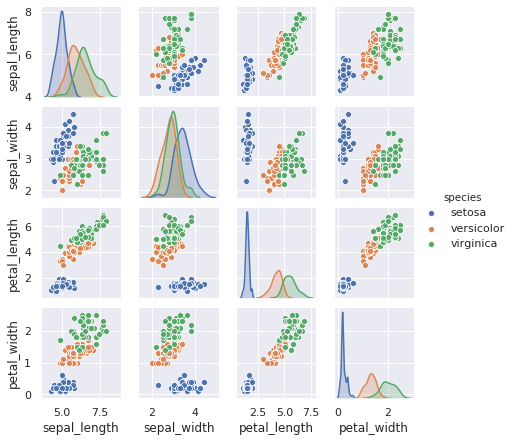

In [5]:
sns.pairplot(data, hue = hue, height = 1.5);

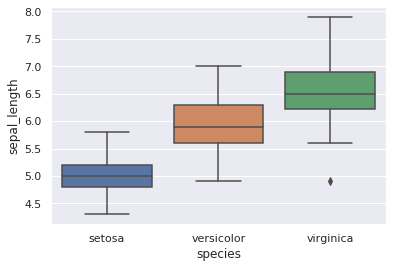

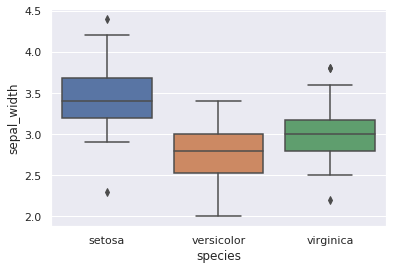

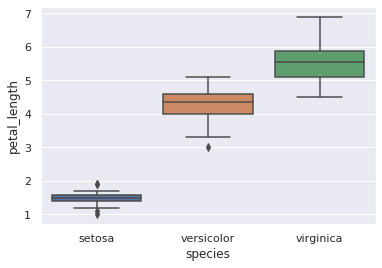

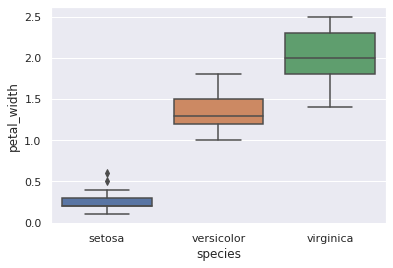

In [6]:
for x in X.keys():
    sns.boxplot(x = 'species', y = x, data = data)
    plt.show()

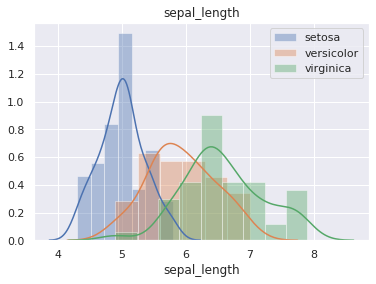

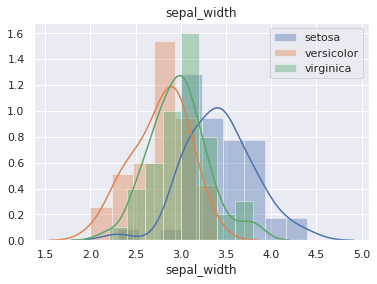

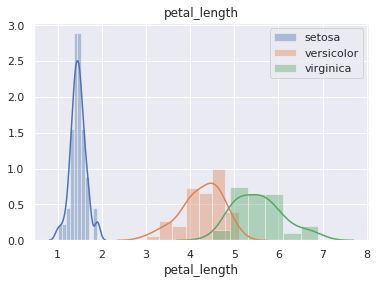

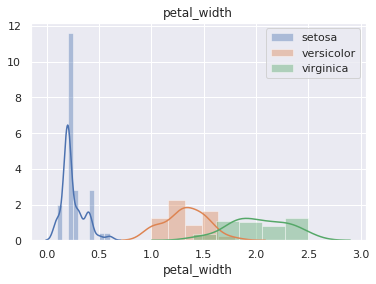

In [7]:
for x in X.keys():
    for species in labels:
        sns.distplot(data[data.species == species][x], hist=True, kde=True, label=species)
    plt.title(x)
    plt.legend()
    plt.show()

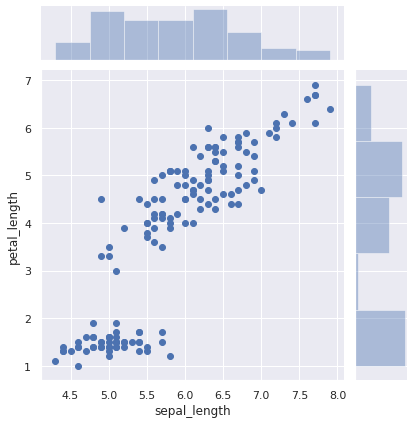

In [8]:
_ = sns.jointplot('sepal_length', 'petal_length', data=data)
plt.show()

# Data Splitting

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7, test_size = 0.3)

# Models

## Linear Regression

In [0]:
# Simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.intercept_); print(model.coef_)

## Naive Bayes

In [0]:
# Gaussian Naive Bayes
# Assumes the features of a classifier are distributed normally
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
# Multinomial Naive Bayes
# Appropriate for features that represent counts or count rates
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Support Vector Machines

In [0]:
# Linear support vector classifier
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
# Polynomial support vector classifier
from sklearn.svm import SVC
model = SVC(kernel = 'poly', C = 1E10, gamma = 'auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
# Radial support vector classifier
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', C = 1E10, gamma = 'auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
# Sigmoid support vector classifier
from sklearn.svm import SVC
model = SVC(kernel = 'sigmoid', C = 1E10, gamma = 'auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Decision Tree

In [0]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Validation

In [0]:
# Coefficient of determination
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [0]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred, labels = labels) # Return confusion matrix
norm_mat = mat.astype('float') / mat.sum(axis = 1)[:, np.newaxis] # Normalize confusion matrix
plt.figure(figsize=(8,8))
sns.set(font_scale=1.8)
sns.heatmap(norm_mat, square = True, annot = True, cbar = False, cmap = 'binary',
            xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('True')

In [0]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = labels))